In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dayImages, nightImages, testImages = glob.glob("Pictures/*")

###  Day Image

In [3]:
dimg = glob.glob(dayImages+"/*.jpg")

In [4]:
img = cv2.imread(dimg[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

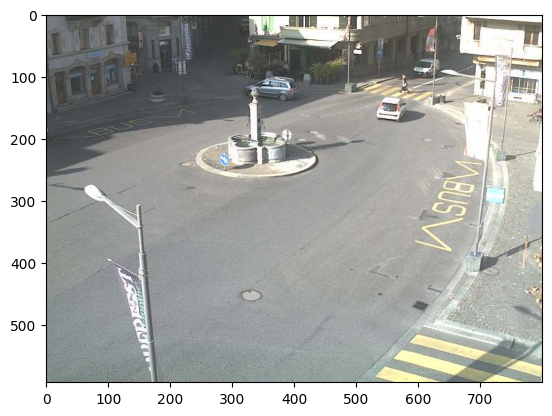

In [ ]:
plt.imshow(img)

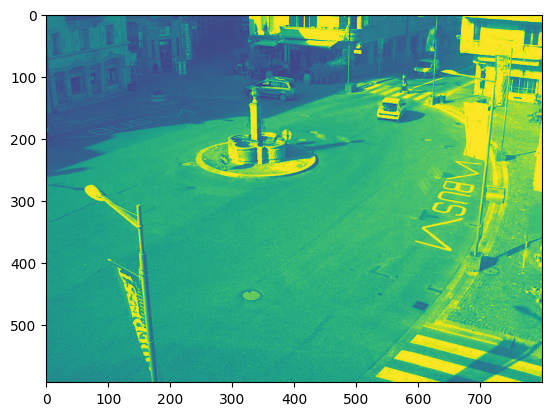

In [6]:
plt.imshow(img[:,:,0])

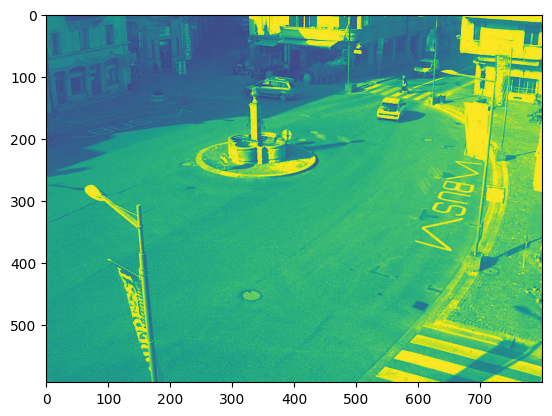

In [7]:
plt.imshow(img[:,:,1])

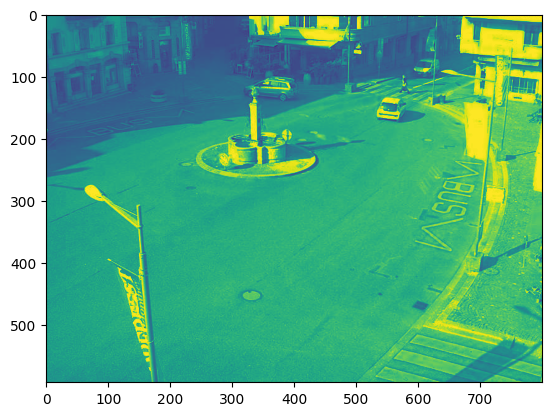

In [8]:
plt.imshow(img[:,:,2])

#### RGB to HSV

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)/255.

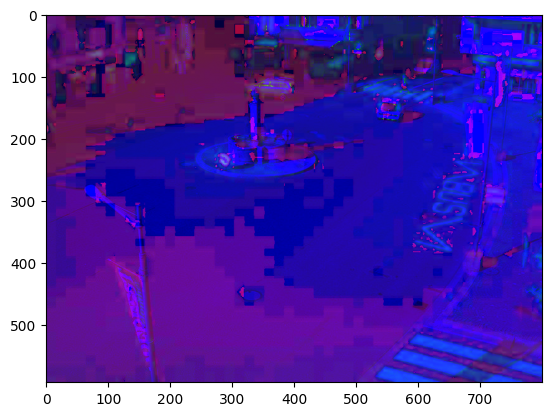

In [10]:
plt.imshow(img)

In [11]:
h = img[:,:,0]
s = img[:,:,1]
v = img[:,:,2]

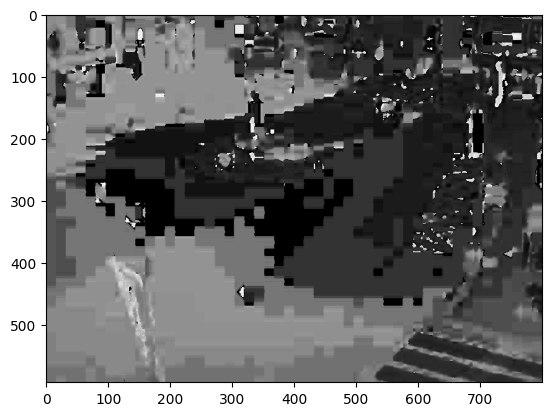

In [12]:
plt.imshow(h, cmap = "gray")

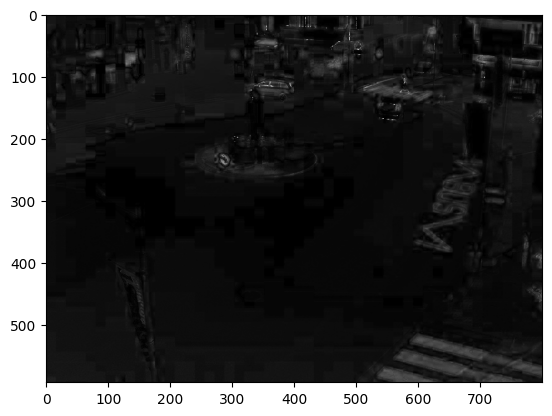

In [13]:
plt.imshow(s, cmap = "gray")

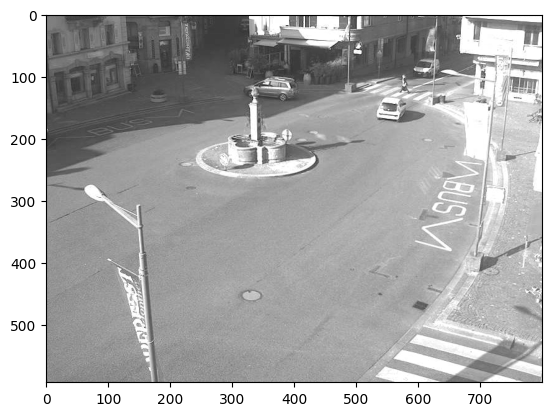

In [14]:
plt.imshow(v, cmap = "gray")

In [15]:
daySum = np.sum(v)

In [16]:
dimg2 = cv2.imread(dimg[1])

In [17]:
dimg2 = cv2.cvtColor(dimg2, cv2.COLOR_BGR2HSV)/255.

In [18]:
dh2 = dimg2[:,:,0]
ds2 = dimg2[:,:,1]
dv2 = dimg2[:,:,2]

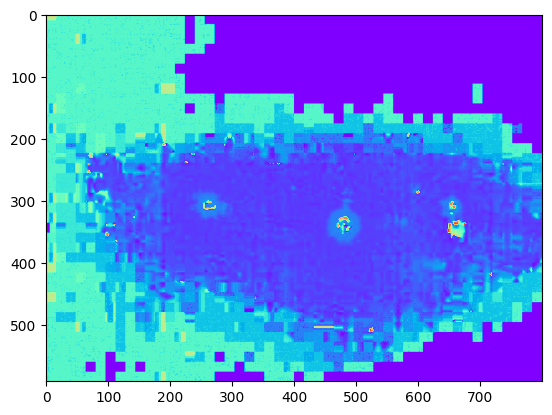

In [19]:
plt.imshow(dh2, cmap = "rainbow")

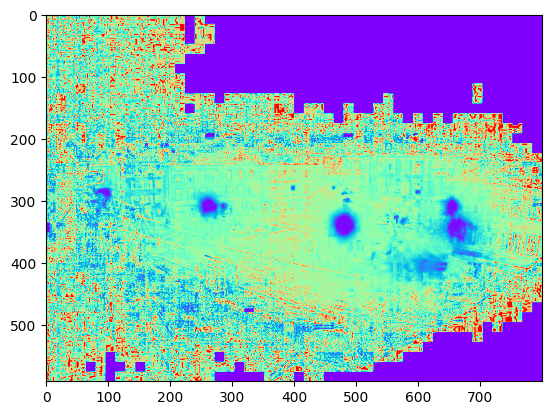

In [20]:
plt.imshow(ds2, cmap = "rainbow")

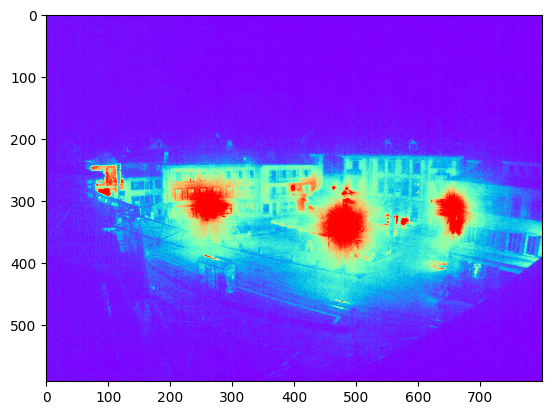

In [21]:
plt.imshow(dv2, cmap = "rainbow")

In [22]:
day2Sum = np.sum(dv2)

### Night Image

In [23]:
nimg = glob.glob(nightImages+"/*.jpg")
nightImg = cv2.imread(nimg[0])

In [24]:
nightImg = cv2.cvtColor(nightImg, cv2.COLOR_BGR2HSV)/255.

In [25]:
nh = nightImg[:,:,0]
ns = nightImg[:,:,1]
nv = nightImg[:,:,2]

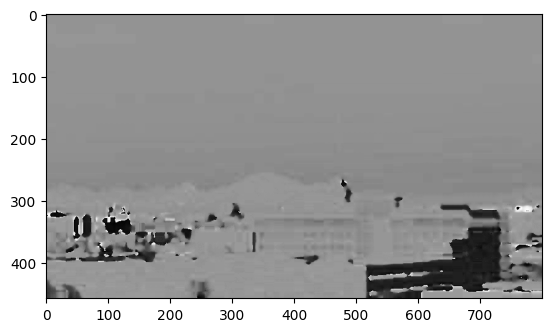

In [26]:
plt.imshow(nh, cmap = "gray")

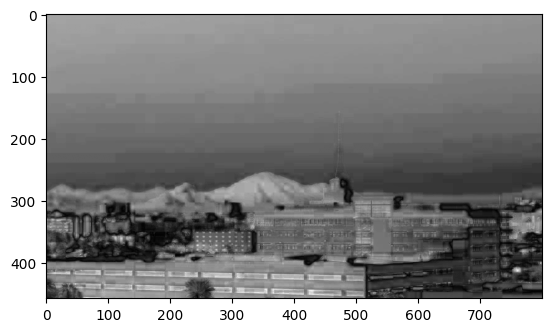

In [27]:
plt.imshow(ns, cmap = "gray")

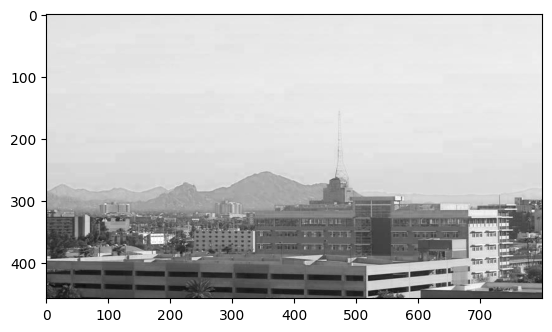

In [28]:
plt.imshow(nv, cmap = "gray")

In [29]:
nightSum = np.sum(nv)

In [30]:
nightSum < daySum

True

In [31]:
nimg2 = cv2.imread(nimg[1])

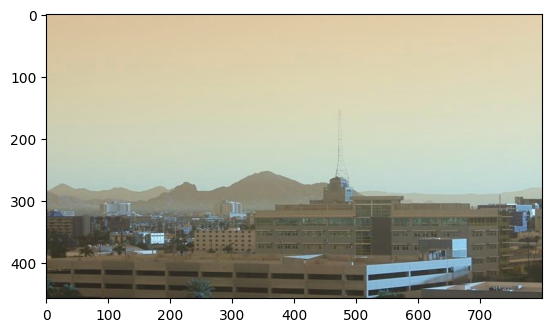

In [32]:
plt.imshow(nimg2, cmap = "gray")

In [33]:
nimg2 = cv2.cvtColor(nimg2, cv2.COLOR_BGR2HSV)/255.

In [34]:
nh2 = nimg2[:,:,0]
nv2 = nimg2[:,:,1]
ns2 = nimg2[:,:,2]

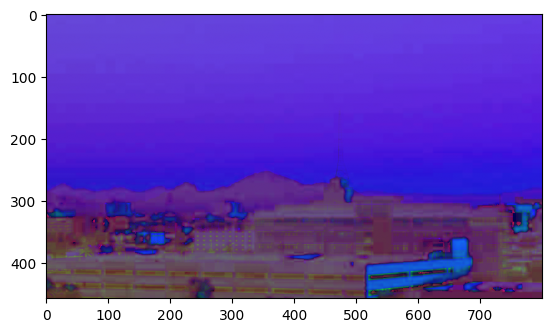

In [35]:
plt.imshow(nimg2, cmap = "gray")

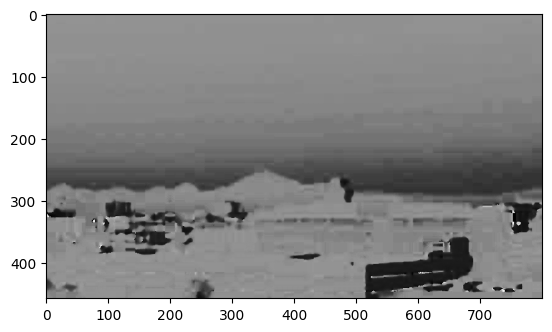

In [36]:
plt.imshow(nh2, cmap = "gray")

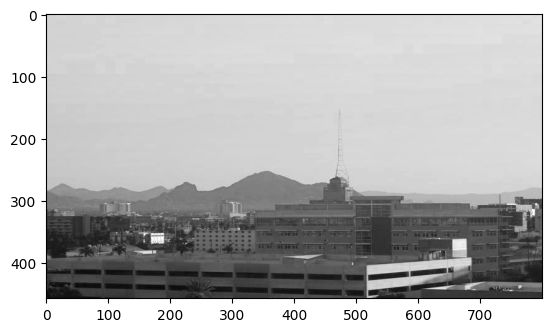

In [37]:
plt.imshow(ns2, cmap = "gray")

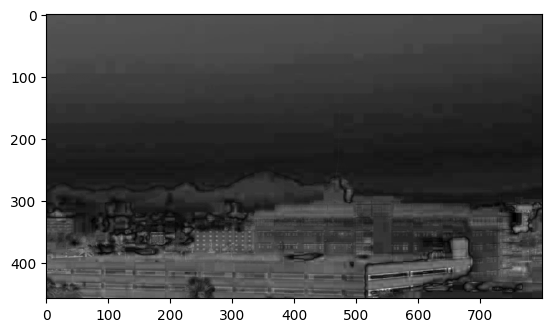

In [38]:
plt.imshow(nv2, cmap = "gray")

In [39]:
night2Sum = np.sum(nv2)

In [40]:
night2Sum

66483.92941176471

In [41]:
day2Sum

64657.45490196079

In [42]:
dayThresoldList = [daySum, day2Sum]
nightThresoldList = [nightSum, night2Sum]

In [43]:
dayThresoldList

[292192.7568627451, 64657.45490196079]

In [44]:
nightThresoldList

[279186.02352941176, 66483.92941176471]

In [45]:
dv2

array([[0.02745098, 0.03137255, 0.03921569, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.02745098, 0.03529412, 0.03921569, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.02745098, 0.03137255, 0.03921569, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.01568627, 0.01176471, 0.00784314, ..., 0.00784314, 0.00784314,
        0.00784314],
       [0.01176471, 0.01960784, 0.01568627, ..., 0.00784314, 0.00784314,
        0.00784314],
       [0.01176471, 0.02745098, 0.02745098, ..., 0.00784314, 0.00784314,
        0.00784314]])

In [46]:
nv2

array([[0.2745098 , 0.2745098 , 0.2745098 , ..., 0.22745098, 0.22745098,
        0.22745098],
       [0.2745098 , 0.2745098 , 0.2745098 , ..., 0.22352941, 0.22352941,
        0.22352941],
       [0.2745098 , 0.2745098 , 0.2745098 , ..., 0.22745098, 0.22745098,
        0.22745098],
       ...,
       [0.18431373, 0.17254902, 0.16862745, ..., 0.13333333, 0.13333333,
        0.13333333],
       [0.18039216, 0.17254902, 0.16862745, ..., 0.12941176, 0.12941176,
        0.13333333],
       [0.18039216, 0.17254902, 0.16862745, ..., 0.12941176, 0.12941176,
        0.13333333]])

In [47]:
sum(dayThresoldList)/len(dayThresoldList)

178425.10588235295

In [48]:
averageDayThresold = np.mean(dayThresoldList)

In [49]:
averageNightThresold = np.mean(nightThresoldList)

In [50]:
# This is a binary classification problem

In [51]:
if averageDayThresold > averageNightThresold:
    print('Its a day')
else:
    print('Its a night')

Its a day


## Test Set

In [52]:
testimgs = glob.glob(testImages+"/*.jpg")

In [53]:
testimg1 = cv2.imread(testimgs[0])
testimg2 = cv2.imread(testimgs[1])

In [54]:
testimg1 = cv2.cvtColor(testimg1, cv2.COLOR_BGR2HSV)
testimg2 = cv2.cvtColor(testimg2, cv2.COLOR_BGR2HSV)

In [55]:
th1 = testimg1[:,:,0]
ts1 = testimg1[:,:,1]
tv1 = testimg1[:,:,2]

th2 = testimg2[:,:,0]
ts2 = testimg2[:,:,1]
tv2 = testimg2[:,:,2]

In [56]:
testimg1Sum = np.sum(tv1)
testimg2Sum = np.sum(tv2)

In [57]:
if testimg1Sum > averageNightThresold:
    print('Its a day')
else:
    print("Its a night")

Its a day


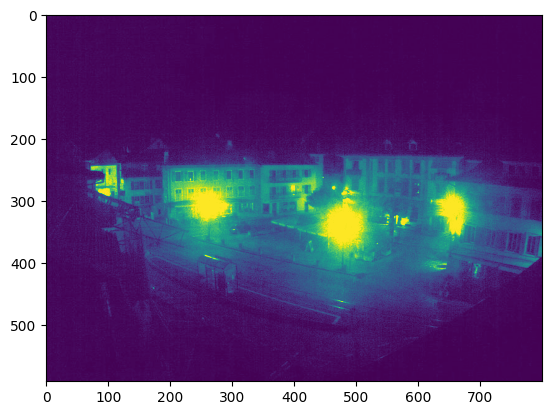

In [58]:
plt.imshow(tv1)

In [59]:
#Hw: create a function, you put in the image path and the function will give you the sum of the hsv image(value part)

In [60]:
def hsvSum(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)/255.
    valSum = np.sum(img[:,:,2])
    return valSum